# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Let's firs hide warnings just in case

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Read the data
df = pd.read_csv('agaricus-lepiota.data')
# remove edibility and use one hot encoding
df = df.drop(['edibility'], axis=1)
df_encoded = pd.get_dummies(df)

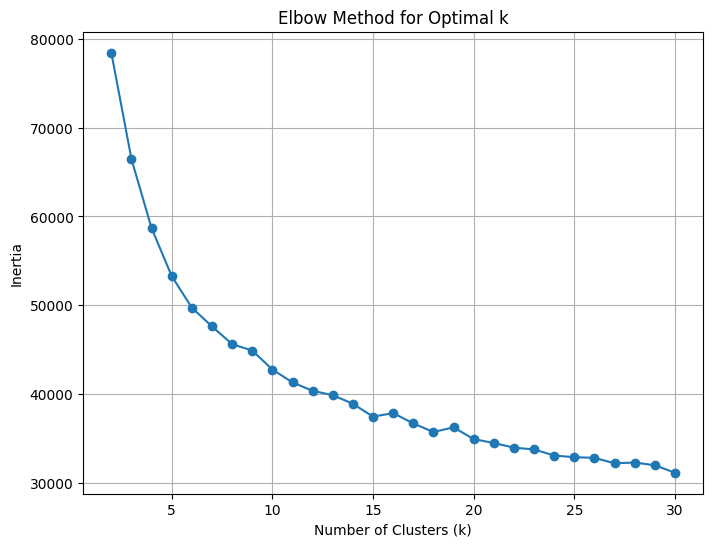

In [61]:
# do kmeans klustering to find the best number of clusters without pca
from sklearn.cluster import KMeans

inertia_values = []
k_values = range(2, 31)

# Calculate inertia for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_encoded)
    inertia_values.append(kmeans.inertia_)


# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# the best number of cluters is the one where the inertia value stops decreasing rapidly
# in this case it is 9 or 10

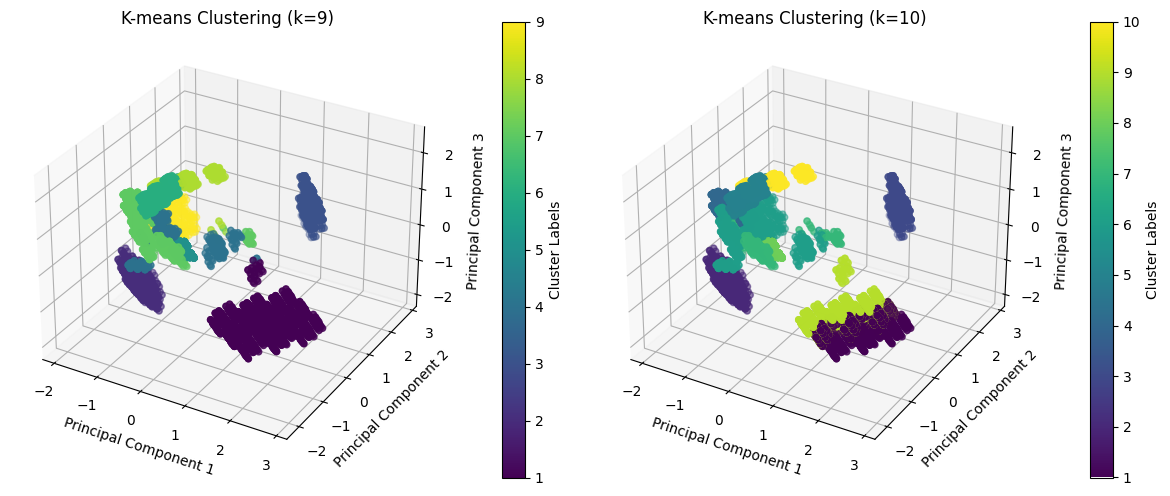

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA with 3 components
pca = PCA(n_components=3)
pca.fit(df_encoded)
df_pca = pca.transform(df_encoded)

# K-means clustering with 9 clusters
kmeans_9 = KMeans(n_clusters=9)
kmeans_9.fit(df_encoded)
df_kmeans_9 = kmeans_9.predict(df_encoded)

# K-means clustering with 10 clusters
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(df_encoded)
df_kmeans_10 = kmeans_10.predict(df_encoded)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})

# Plot the first subplot (K-means with 9 clusters)
scatter1 = ax1.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df_kmeans_9 + 1, cmap='viridis')
ax1.set_title('K-means Clustering (k=9)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Set cluster labels in the color bar to be 1-9
cbar1 = plt.colorbar(scatter1, ax=ax1, pad=0.1, ticks=range(1, 10))
cbar1.set_label('Cluster Labels')

# Plot the second subplot (K-means with 10 clusters)
scatter2 = ax2.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df_kmeans_10 + 1, cmap='viridis')
ax2.set_title('K-means Clustering (k=10)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

# Set cluster labels in the color bar to be 1-10
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.1, ticks=range(1, 11))
cbar2.set_label('Cluster Labels')

# Show the plot
plt.tight_layout()
plt.show()
